In [72]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
to_categorical = tf.keras.utils.to_categorical

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

import plotly.express as px
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sn

from collections import Counter

In [73]:
x, y =  make_circles(n_samples=5000, noise=0.1, random_state=1)

In [74]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle= True)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2500, 2), (2500, 2), (2500,), (2500,))

In [75]:
x_train_pd = pd.DataFrame(x_train, columns=['x', 'y'])
y_train_pd = pd.DataFrame(y_train, columns=['class'], dtype='str')

df = pd.concat([x_train_pd, y_train_pd], axis=1)

In [76]:
fig = px.scatter(df, x="x", y="y", color="class")
fig.show()

In [77]:
model = tf.keras.models.Sequential()          
model.add(tf.keras.layers.Dense(60, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [78]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
his = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2000, verbose=1, batch_size = 256)

Epoch 1/2000
10/10 [==============================] - 1s 23ms/step - loss: 0.7324 - accuracy: 0.4968 - val_loss: 0.6906 - val_accuracy: 0.5100
Epoch 2/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.7036 - accuracy: 0.5180 - val_loss: 0.6867 - val_accuracy: 0.5248
Epoch 3/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.7002 - accuracy: 0.5312 - val_loss: 0.6814 - val_accuracy: 0.5272
Epoch 4/2000
10/10 [==============================] - 0s 7ms/step - loss: 0.6985 - accuracy: 0.5272 - val_loss: 0.6772 - val_accuracy: 0.5276
Epoch 5/2000
10/10 [==============================] - 0s 7ms/step - loss: 0.6957 - accuracy: 0.5220 - val_loss: 0.6741 - val_accuracy: 0.5716
Epoch 6/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.6913 - accuracy: 0.5328 - val_loss: 0.6702 - val_accuracy: 0.5524
Epoch 7/2000
10/10 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.5316 - val_loss: 0.6674 - val_accuracy: 0.5892
Epoch

In [ ]:
h1 = go.Scatter(y=his.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
h1 = go.Scatter(y=his.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.4f, Validation: %.4f' % (train_acc, val_acc))

In [ ]:
c = Counter(y_val)
c

In [ ]:
predicted_classes = (model.predict(x_val) > 0.5).astype("int32")[:,0]

In [ ]:
cm = confusion_matrix(y_val, predicted_classes)
cm

In [ ]:
labels = ['No', 'Yes']

In [ ]:
def cm_plot(cm, labels):
    x = labels
    y = labels

    z_text = [[str(y) for y in x] for x in cm]
    fig = ff.create_annotated_heatmap(cm, x=x, y=y, annotation_text=z_text, colorscale='blues')

    fig.update_layout(title_text='Confusion Matrix')

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted Value",
                            xref="paper",
                            yref="paper"
                           ))

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=-0.20,
                            y=0.5,
                            showarrow=False,
                            text="Real Value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"
                           ))

    fig.update_layout(margin=dict(t=50, l=200))
    fig['layout']['yaxis']['autorange'] = "reversed"

    fig['data'][0]['showscale'] = True
    fig.show()

In [ ]:
cm_plot(cm, labels)

In [ ]:
print(classification_report(y_val, predicted_classes, target_names=labels, digits=4))

In [ ]:
y_score = model.predict(x_val)
y_score = y_score[:,0]

In [ ]:
distribution_df = pd.DataFrame(data={'Score': y_score, 'Class': y_val})
distribution_df.head()

In [ ]:
distribution_df.loc[distribution_df['Class'] == 1, 'Class'] = 'Yes'
distribution_df.loc[distribution_df['Class'] == 0, 'Class'] = 'No'
distribution_df.sample(10)

In [ ]:
fig = px.histogram(distribution_df, x='Score', color='Class', nbins=50)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.85)

In [ ]:
fpr, tpr, threshold = roc_curve(y_val, y_score)
roc_auc = auc(fpr, tpr)

In [ ]:
roc_df = pd.DataFrame(data={'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})
roc_df.head()

In [ ]:
def binary_roc_plot(roc_df, roc_auc):
    fig = px.area(
        data_frame=roc_df, 
        x='False Positive Rate', 
        y='True Positive Rate',
        hover_data=['Threshold'], 
        title=f'ROC Curve (AUC={roc_auc:.4f})',
        width=700, height=500,
    )

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    hovertemplate = 'False Positive Rate=%{x:.4f}<br>True Positive Rate=%{y:.4f}<br>Threshold=%{customdata[0]:.4f}'
    fig.update_traces(hovertemplate=hovertemplate)

    fig.show()

In [ ]:
binary_roc_plot(roc_df, roc_auc)

In [ ]:
predicted_classes = (model.predict(x_val) > 0.4516).astype("int32")[:,0]

In [ ]:
cm = confusion_matrix(y_val, predicted_classes)
cm

In [ ]:
cm_plot(cm, labels)

In [ ]:
print(classification_report(y_val, predicted_classes, target_names=labels, digits=4))

# **Multi-Class Classification Evaluation**

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
VAL_SIZE = 0.2
RANDOM_STATE = 99
BATCH_SIZE = 256

INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Fashion MNIST train -  rows:",x_train.shape[0]," columns:", x_train.shape[1], " rows:", x_train.shape[2])
print("Fashion MNIST test -  rows:",x_test.shape[0]," columns:", x_test.shape[1], " rows:", x_test.shape[2])

In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
for i in range(16):
    ax = plt.subplot(4, 4, 1+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('%s'%(labels[y_train[i]]))
    plt.imshow(x_train[i], cmap=plt.get_cmap('Blues'))

plt.tight_layout()
plt.savefig('fashion_mnist.jpeg', dpi=300)

In [ ]:
print(x_train.shape, x_test.shape)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print(x_train.shape, x_test.shape)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=VAL_SIZE, random_state=RANDOM_STATE)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

In [ ]:
#Feature Extraction
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

#Image Classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

In [ ]:
NO_EPOCHS = 15

history = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

In [127]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [128]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [129]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

In [130]:
y_true = np.argmax(y_test, axis=1)

In [131]:
c = Counter(y_true)
c

Counter({0: 1000,
         1: 1000,
         2: 1000,
         3: 1000,
         4: 1000,
         5: 1000,
         6: 1000,
         7: 1000,
         8: 1000,
         9: 1000})

In [132]:
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[877,   1,  18,  15,   1,   1,  79,   0,   8,   0],
       [  0, 974,   0,  19,   2,   0,   3,   0,   2,   0],
       [ 14,   0, 888,   8,  42,   0,  46,   0,   2,   0],
       [  9,   1,  11, 941,  17,   0,  19,   0,   2,   0],
       [  0,   0,  39,  34, 880,   0,  46,   0,   1,   0],
       [  0,   0,   0,   0,   0, 988,   0,   8,   0,   4],
       [ 97,   0,  44,  25,  61,   0, 761,   0,  12,   0],
       [  0,   0,   0,   0,   0,   5,   0, 979,   0,  16],
       [  2,   1,   1,   5,   1,   3,   1,   2, 984,   0],
       [  0,   0,   0,   0,   0,   7,   0,  30,   1, 962]])

In [133]:
cm_plot(cm, labels)

In [134]:
print(classification_report(y_true, predicted_classes, target_names=labels, digits=4))

              precision    recall  f1-score   support

 T-shirt/top     0.8779    0.8770    0.8774      1000
     Trouser     0.9969    0.9740    0.9853      1000
    Pullover     0.8871    0.8880    0.8876      1000
       Dress     0.8988    0.9410    0.9194      1000
        Coat     0.8765    0.8800    0.8782      1000
      Sandal     0.9841    0.9880    0.9860      1000
       Shirt     0.7969    0.7610    0.7785      1000
     Sneaker     0.9607    0.9790    0.9698      1000
         Bag     0.9723    0.9840    0.9781      1000
  Ankle boot     0.9796    0.9620    0.9707      1000

    accuracy                         0.9234     10000
   macro avg     0.9231    0.9234    0.9231     10000
weighted avg     0.9231    0.9234    0.9231     10000



In [135]:
predicted_score = model.predict(x_test)
predicted_score.shape, y_test.shape

((10000, 10), (10000, 10))

In [136]:
hovertemplate = 'False Positive Rate=%{x:.4f}<br>True Positive Rate=%{y:.4f}<br>Threshold=%{text:.4f}'
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(predicted_score.shape[1]):
    y_real = y_test[:, i]
    y_score = predicted_score[:, i]

    fpr, tpr, threshold = roc_curve(y_real, y_score)
    auc_score = auc(fpr, tpr)

    name = f"{labels[i]}, AUC={auc_score:.4f}"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines', text=threshold, hovertemplate=hovertemplate))

fig.update_layout(
    title='ROC Curve and AUC',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
)

fig.show()

In [137]:
y_true, predicted_classes

(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5]))

In [138]:
false_predict = y_true!=predicted_classes

class6 = y_true==6

false_predict_class6 = class6 & false_predict

Counter(false_predict_class6)

Counter({False: 9761, True: 239})

In [139]:
class6_img = x_test[false_predict_class6]
class6_y = predicted_classes[false_predict_class6]
false_predict_labels = [labels[class_num] for class_num in class6_y]

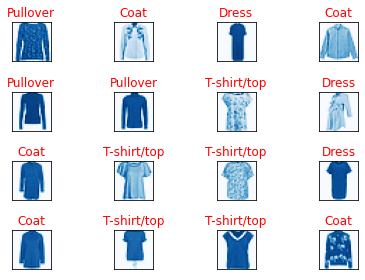

In [149]:
for i in range(16):
    ax = plt.subplot(4, 4, 1+i)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('%s'%(false_predict_labels[i]), color='red')
    img = class6_img[i].reshape(class6_img[i].shape[0], class6_img[i].shape[1])
    plt.imshow(img, cmap=plt.get_cmap('Blues'))

plt.tight_layout()
plt.savefig('class6_fashion_mnist.jpeg', dpi=300)